# Investigate the effect of logp1 transformation on the dmatrix

In [214]:
import numpy as np
import os

In [215]:
# Load the .npz file (Replace with your actual file path)
# file_path = r"C:\Users\George\Desktop\Automatic Control and Robotics\Semester 7\Thesis\Neural Networks\Workspace\preprocessed_datasets\npz_d_matrices_only\d_matrices_Train_2025-02-05_18-09-58.npz"
# dmatrices with masks
# file_path = r"C:\Users\George\Desktop\Automatic Control and Robotics\Semester 7\Thesis\Neural Networks\Workspace\d_matrices_masks_correctness_audiograms_Train_Independent_2025-02-08_16-30-35.npz"
# d_matrices 2d with masks
file_path = r"C:\Users\George\Desktop\Automatic Control and Robotics\Semester 7\Thesis\Neural Networks\Workspace\preprocessed_datasets\npz_d_matrices_2d_masks_correctness\d_matrices_2d_masks_correctness_audiograms_Train_2025-02-08_18-28-50.npz"

data = np.load(file_path)

In [216]:
# List all keys inside the .npz file
print("Keys in the dataset:", list(data.keys()))

Keys in the dataset: ['d_matrices', 'masks', 'correctness', 'audiograms']


In [217]:
# Extract the d-matrices
d_matrices = data["d_matrices"]
print("\nShape of d_matrices:", d_matrices.shape)
print("Data type of d_matrices:", d_matrices.dtype)

# Check min, max, and mean values
print("\n--- d_matrices Stats ---")
print("Min:", np.min(d_matrices))
print("Max:", np.max(d_matrices))
print("Mean:", np.mean(d_matrices))
print("Std Dev:", np.std(d_matrices))


Shape of d_matrices: (4863, 277, 15)
Data type of d_matrices: float32

--- d_matrices Stats ---
Min: -0.9044663
Max: 0.9998167
Mean: 0.37809524
Std Dev: 0.4095586


In [218]:
# Extract the masks
masks = data["masks"]
print("\nShape of masks:", masks.shape)
print("Data type of masks:", masks.dtype)

# Check min, max, and mean values
print("\n--- masks Stats ---")
print("Min:", np.min(masks))
print("Max:", np.max(masks))
print("Mean:", np.mean(masks))
print("Std Dev:", np.std(masks))


Shape of masks: (4863, 277, 15)
Data type of masks: float32

--- masks Stats ---
Min: 0.0
Max: 1.0
Mean: 0.51237404
Std Dev: 0.49984714


In [219]:
# Visualize the first sample (optional)
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from time import sleep
%matplotlib inline

In [220]:
print(d_matrices.shape)
print(masks.shape)

(4863, 277, 15)
(4863, 277, 15)


In [221]:
print(d_matrices[0].shape)
print(masks[0].shape)

(277, 15)
(277, 15)


In [222]:
print(d_matrices[0][0].shape)
print(masks[0][0].shape)
print(masks[0].sum())

(15,)
(15,)
2640.0


In [223]:
# track largest and smallest values - TO SEE IF THEY NEED TO BE NORMALIZED
min_val = np.min(d_matrices[3])
max_val = np.max(d_matrices[3])
print("Min:", min_val)
print("Max:", max_val)

Min: -0.35701436
Max: 0.9221731


In [224]:
# shape of the d_matrices
print(d_matrices.shape)

# Reverse the order of the time axis
d_matrices = np.flip(d_matrices, axis=2)

# shape of the d_matrices
print(d_matrices.shape)


(4863, 277, 15)
(4863, 277, 15)


In [225]:
# Switch the 1st and 2nd dimensions of the d-matrix
d_matrices = np.moveaxis(d_matrices, 1, 2)

In [226]:
print(d_matrices.shape)
print(masks.shape)

(4863, 15, 277)
(4863, 277, 15)


In [227]:
d_matrices = d_matrices/30

In [228]:
# Use logp1 normalization
d_matrices_norm = np.log1p(d_matrices)

Mask index corresponding to time frames where the padding starts: 176.0


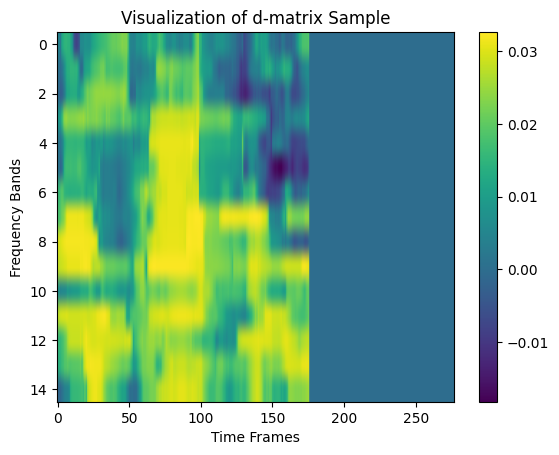

In [229]:
# Plot the dmatrix of one training sample (one output dmatrix from stoi whose input is target and spin)
plt.imshow(d_matrices[0], aspect="auto", cmap="viridis")
plt.colorbar()
plt.title("Visualization of d-matrix Sample")
plt.xlabel("Time Frames")
plt.ylabel("Frequency Bands")
print("Mask index corresponding to time frames where the padding starts:", masks[0].sum()/15)

Mask index corresponding to time frames where the padding starts: 176.0


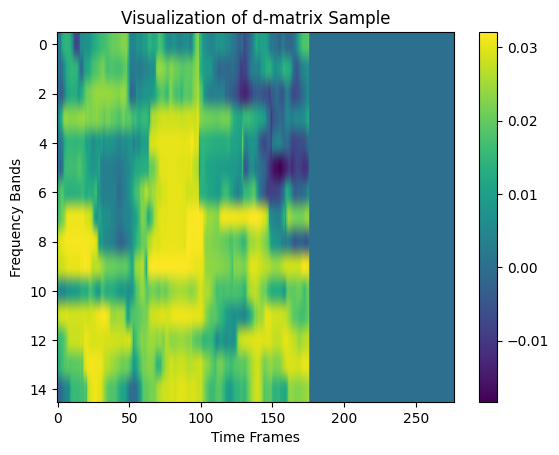

In [230]:
# Now plot again
plt.imshow(d_matrices_norm[0], aspect="auto", cmap="viridis")
plt.colorbar()
plt.title("Visualization of d-matrix Sample")
plt.xlabel("Time Frames")
plt.ylabel("Frequency Bands")
print("Mask index corresponding to time frames where the padding starts:", masks[0].sum()/15)

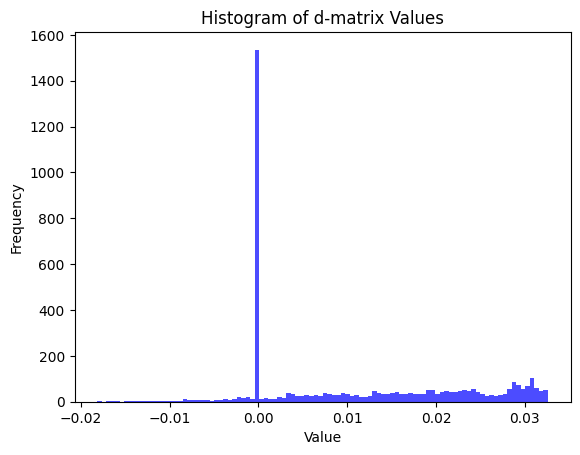

In [231]:
# Plot histogram of the d-matrix values
plt.hist(d_matrices[0].flatten(), bins=100, color="blue", alpha=0.7)
plt.title("Histogram of d-matrix Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

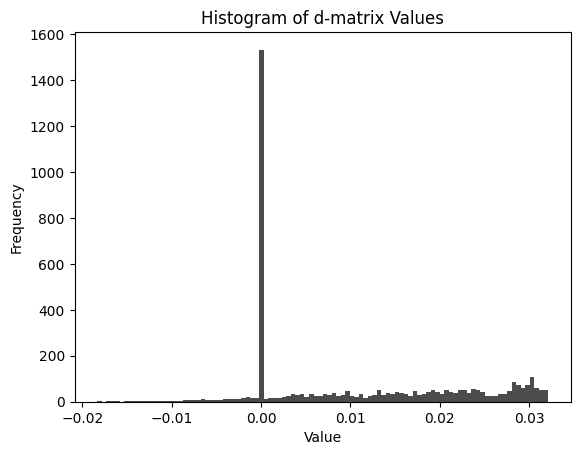

In [232]:
# Plot histogram of the d-matrix values
plt.hist(d_matrices_norm[0].flatten(), bins=100, color="black", alpha=0.7)
plt.title("Histogram of d-matrix Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [233]:
# Close the dataset
data.close()